# TP2 - Spatial Filtering and FFT

Ecole Centrale Nantes

Diana Mateus

Participants: Chaitanya Krishna VIRIYALA

# 0. Preparation

* The goal of this exercise is to create and apply several filters on different images. 

* Handling several images can create large memory demands. In order to avoid large size files reuse the image variable names or clear large variables with the command

example: ```reset_selective name_variable```

* Submit the jupyter notebook empty. To do so, go to the Kernel menu, restart and clear output. 

* Use always the relative given path for the images

* If you get some warnings "IOPub data rate exceeded" lauch your notebook with

```jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000```

* Resize the images for debugging to accelerate the process

### 0.1 Importing the required modules


In [2]:
import skimage.io as io
from skimage.transform import resize
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.morphology import disk

### 0.2 Define the main image folder
Make sure the subsequent parts of this notebook refer to this definition IMDIR. **When evaluating your notebook I should only need to change the path here** to run the entire notebook.

In [3]:
IMDIR = "./images/"


### 0.3 Read and display the images
Check that you can read and display all the provided images. **Do not include this cell**, neither the code nor its ouput in the final report.

G:\Anaconda3\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')
G:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


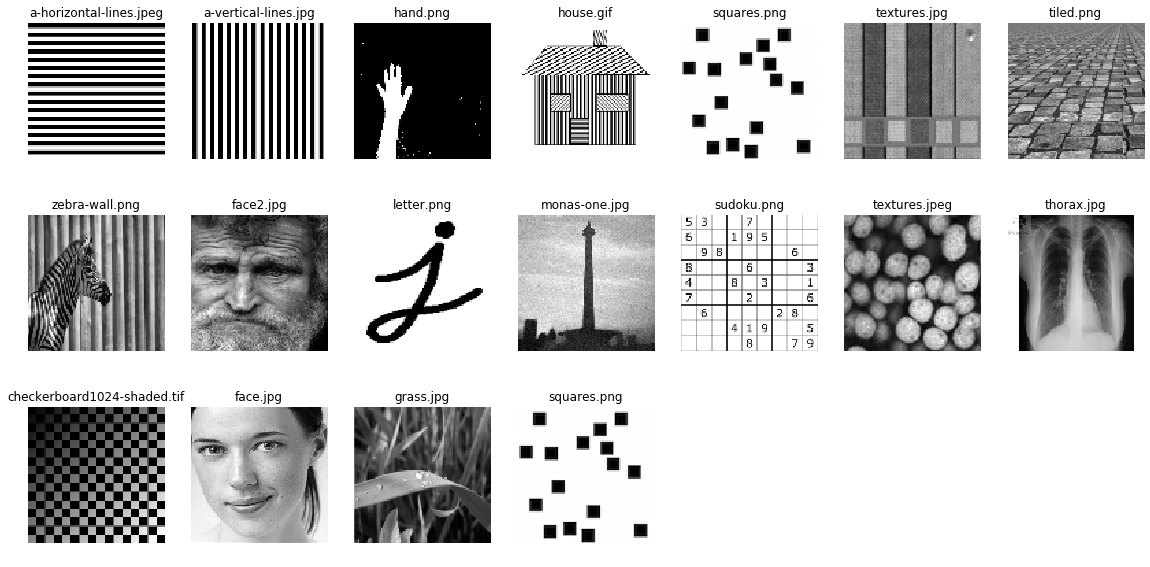

In [4]:

width=20
height=10
plt.rcParams['figure.figsize'] = [width, height]
            
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # print the paths to current filename if nothing is being found
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100),mode='constant')

            
            # display it
            plt.subplot(3,7,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 


plt.show()

# 1. Smoothing 

### 1.1 Smoothing kernels
For each of the following two kernels:
- Mean
- Gaussian

Create a function that receives the required parameters of the kernel (e.g. halfsize of the windows) and gives as output the corresponding kernel matrix. Display 3 instances of each kernel with different parameters (or once if the filter is non-parametric)


```Hints```:
- Show that the element sum of the kernels is equals 1.
- You may want to use functions like ```np.arange```, ```np.linspace``` and/or ```np.meshgrid``` for creating the regular grid onto which to evalute the Gaussian filter.
- use the 'None' or 'Nearest' interpolation options of imshow to display the kernel images

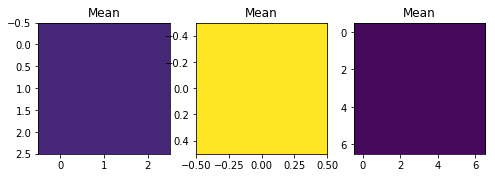

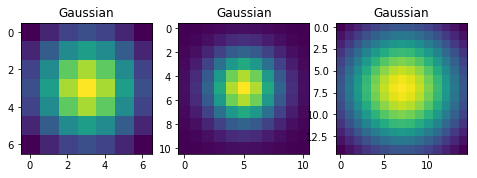

In [6]:
def meanKernel(hs):
    
    kernel=np.ones((hs,hs))
    kernel=kernel/np.sum(kernel)
    return kernel

def gaussianKernel(hs,sig):
    x=np.arange(-hs,hs+1)
    xx,yy=np.meshgrid(x,x)
    kernel=1/(2*3.14*sig**2)*np.exp(-(xx**2+yy**2)/(2*sig**2))
    return kernel / np.sum(kernel)


width=8
height=3
plt.rcParams['figure.figsize'] = [width, height]

#Displaying different mean kernels
k = 1
for hs in [3,1,7]:
    plt.subplot(1,3,k)
    kernel = meanKernel(hs)
    plt.imshow(kernel, vmin=0, vmax=1)
    plt.title('Mean')
    k+=1
plt.show()

#Displaying different Gaussian kernels
plt.subplot(1,3,1)
kernel = gaussianKernel(3,2)
plt.imshow(kernel,interpolation='Nearest')
plt.title('Gaussian')

plt.subplot(1,3,2)
kernel = gaussianKernel(5,2)
plt.imshow(kernel,interpolation='Nearest')
plt.title('Gaussian')

plt.subplot(1,3,3)
kernel = gaussianKernel(7,5)
plt.imshow(kernel,interpolation='Nearest')
plt.title('Gaussian')
plt.show()






### 1.2 Filtering with convolution

Apply the ```mean``` and the ```Gaussian``` filters from the previous exercise to the images in the ```smooth``` folder. 

Use the scipy convolution function
```python
ndimage.convolve(im,kernel)
```

Choose an image and show the results for different sizes (3) of the filter and Gaussian variance (3).

```Hint```: Convert the images to grayscale before filtering. 
- you can use your own ```rgb2gray``` function or read the images with the ```io.imread``` function with mode ```as_grey=True```. 


./images/smooth\checkerboard1024-shaded.tif


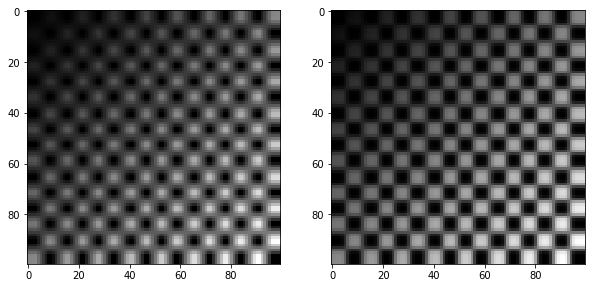

./images/smooth\face.jpg


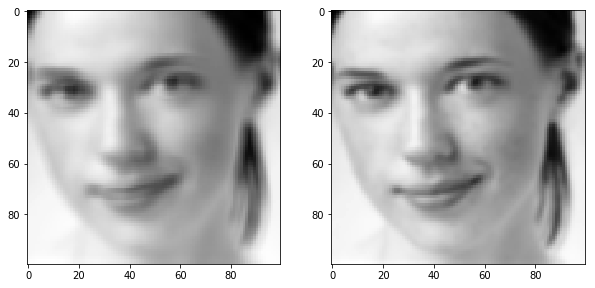

./images/smooth\grass.jpg


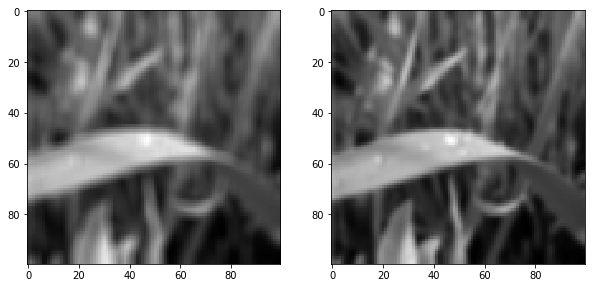

./images/smooth\squares.png


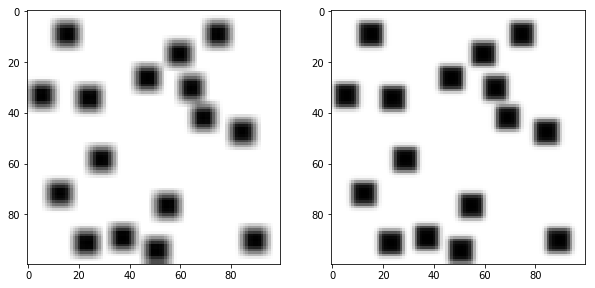

In [7]:
SUBDIR = os.path.join(IMDIR, "smooth")

width=10
height=5

hs = 5
sigma = 1

for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            im = io.imread(f, as_grey=True)
            im = resize(im,(100,100))
    
            kernel1 = meanKernel(hs)# FILL IN WITH YOUR OWN KERNEL 
            kernel2 = gaussianKernel(hs,sigma)# FILL IN WITH YOUR OWN KERNEL 
            im_filtered_1 = ndimage.convolve(im,kernel1)# APPLY CONVOLUTION ndimage.convolve(im,kernel)
            im_filtered_2 = ndimage.convolve(im,kernel2)# APPLY CONVOLUTION ndimage.convolve(im,kernel)

            fig=plt.figure(figsize=(width, height))
            plt.subplot(121)
            plt.imshow(im_filtered_1,cmap='gray')
            plt.subplot(122)
            #DISPLAY THE RESULTS
            plt.imshow(im_filtered_2,cmap='gray')
            
            plt.show()



## 2. Derivative filters

2.1 Create a function that generates the 3 kernels required to compute 
- the *image gradient* in the x and in the y direction(Sobel filters),
- the *image Laplacian* (the output should be 3 kernel matrices).

2.2 Filter the images in the ``gradient`` folder with each kernel from 2.1. Show the resultant gradients in each direction, the gradient magnitude, and the laplacian.

2.4. **Write down your remarks for each image**: (e.g. why are some edges visible and others not?, when does it make sense to smooth, what are the limitations? etc...)




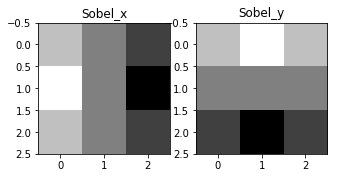

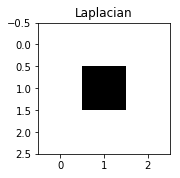

./images/gradient\face2.jpg


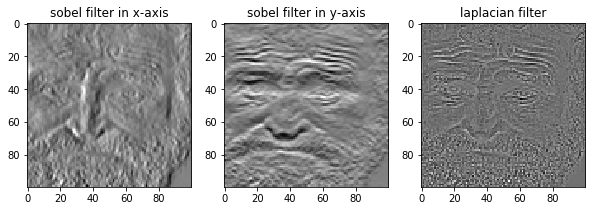

./images/gradient\letter.png


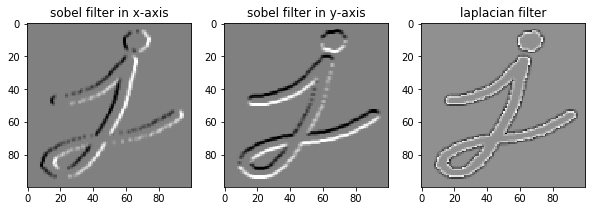

./images/gradient\monas-one.jpg


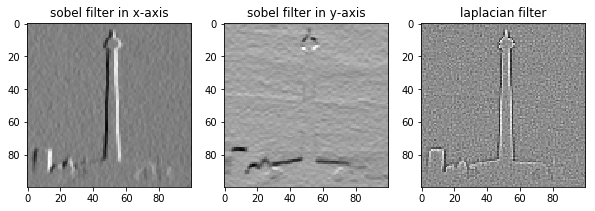

./images/gradient\sudoku.png


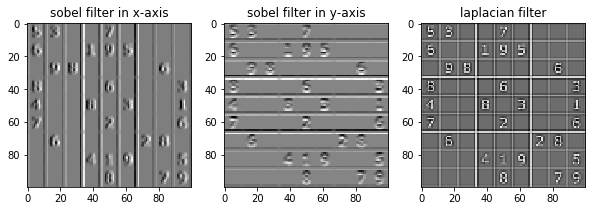

./images/gradient\textures.jpeg


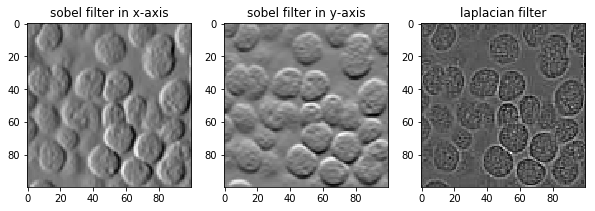

./images/gradient\thorax.jpg


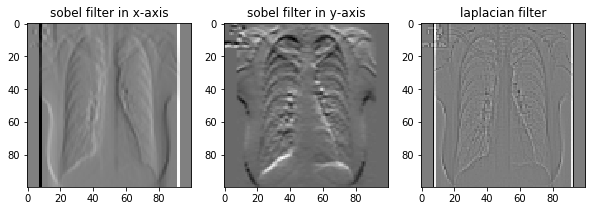

In [45]:
def rgb2gray(input_im):
    r,g,b=input_im[:,:,0],input_im[:,:,1],input_im[:,:,2]
    gray=0.3086*r+0.6094*g+0.0820*b
    return gray

SUBDIR = os.path.join(IMDIR, "gradient")
def sobel_x():
    kernel = np.zeros((3,3))
    kernel[0,0]=1 #FILL IN
    kernel[1,0]=2#FILL IN
    kernel[2,0]=1 #FILL IN
    kernel[0,1]=0
    kernel[1,1]=0
    kernel[2,1]=0 #FILL IN
    kernel[0,2]=-1 #FILL IN
    kernel[1,2]=-2#FILL IN
    kernel[2,2]=-1#FILL IN
    return kernel 

    
def sobel_y():
    #FILL IN
    kernel = np.zeros((3,3))
    kernel[0,0]=1 #FILL IN
    kernel[1,0]=0#FILL IN
    kernel[2,0]=-1 #FILL IN
    kernel[0,1]=2
    kernel[1,1]=0
    kernel[2,1]=-2 #FILL IN
    kernel[0,2]=1 #FILL IN
    kernel[1,2]=0#FILL IN
    kernel[2,2]=-1#FILL IN
    return kernel 




def laplacian():
    #FILL IN
    kernel = np.zeros((3,3))
    kernel[0,0]=1 #FILL IN
    kernel[1,0]=1#FILL IN
    kernel[2,0]=1 #FILL IN
    kernel[0,1]=1
    kernel[1,1]=-8
    kernel[2,1]=1 #FILL IN
    kernel[0,2]=1 #FILL IN
    kernel[1,2]=1#FILL IN
    kernel[2,2]=1
    return kernel 


#Display the sobel kernels
plt.subplot(1,3,1)
kernel = sobel_x()
plt.imshow(kernel, cmap='gray',interpolation='Nearest')
plt.title('Sobel_x')

plt.subplot(1,3,2)
kernel = sobel_y()
plt.imshow(kernel, cmap='gray',interpolation='Nearest')
plt.title('Sobel_y')
plt.show()

#Display the Laplacian kernel
plt.subplot(1,3,1)
kernel = laplacian()
plt.imshow(kernel, cmap='gray',interpolation='Nearest')
plt.title('Laplacian')
plt.show()

for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            im = io.imread(f, as_grey=True)
            if len(im.shape)>2:
                im=rgb2gray(im)
            im = resize(im,(100,100))
            
            kernel1 = sobel_x()# FILL IN WITH YOUR OWN KERNEL 
            kernel2 = sobel_y()# FILL IN WITH YOUR OWN KERNEL 
            kernel3 = laplacian()
            im_filtered_1 = ndimage.convolve(im,kernel1)# APPLY CONVOLUTION ndimage.convolve(im,kernel)
            im_filtered_2 = ndimage.convolve(im,kernel2)# APPLY CONVOLUTION ndimage.convolve(im,kernel)
            im_filtered_3 = ndimage.convolve(im,kernel3)
            fig=plt.figure(figsize=(width, height))
            plt.subplot(131)
            plt.imshow(im_filtered_1,cmap='gray')
            plt.title('sobel filter in x-axis')
            
            plt.subplot(132)
            #DISPLAY THE RESULTS
            plt.imshow(im_filtered_2,cmap='gray')
            plt.title('sobel filter in y-axis')
            
            plt.subplot(133)
            plt.imshow(im_filtered_3,cmap='gray')
            plt.title('laplacian filter')
            plt.show()

#2.4 1.sobel filter looks like smooth. Because sobel filter is combined by a derivative filter(1, 0, -1) and a smooth filter (1, 2, 1) 
#when you use sobel filter, you can only get the derivative in one direction, so you cannot see the derivative in other direction. Well, in 
#sobel filter you cannot see the slow changing. Sobel filter has thicker border than laplacian's.

## 3. The Discrete Fourier Transform


### Computing and visualizing the FFT  


In this exercise we will compute and visualize a DFT using numpy's fft functions:
- ```np.fft.fft2```: computes the two-dimensional FFT of an image.
- ```np.fft.fftshift```: center the frecuencies in the middle of the image
- ```np.fft.ifftshift```: reverses the centering
- ```np.fft.ifft2```: inverse fourier transform
- ```np.real```: takes the real components of a complex number
- ```np.abs```: recovers the magnitude of a complex number
- ```np.angle```: recovers the phase of a complex number 
- ```np.log```: computes the logarithm

Apply the functions above to the images in the ```Fourier``` folder. Display in a single row for each image:

**a)** the original image 

**b)** the magnitude of its fft (scaled logarithmically)

**c)** the magnitude of its **centered(shifted)** fft (scaled logarithmically)

**c)** the inverse transformed image (input: centered shifted fft, output: should match the original image)

**d) For each image explain what you observe**

**e)** BONUS: Create a low-pass ideal filter (a circle of ones in a black zero backgrownd) in the frequency domain and multiply it with the centered FFT of one of the images. Apply the inverse transformation and comment on the result.


./images/Fourier\a-horizontal-lines.jpeg


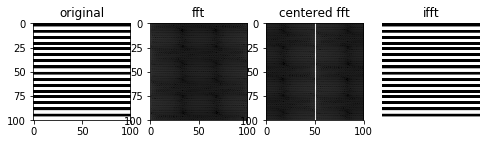

./images/Fourier\a-vertical-lines.jpg


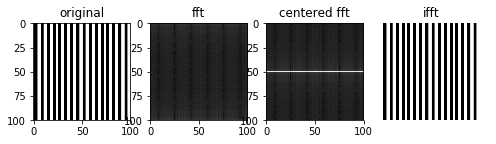

./images/Fourier\hand.png


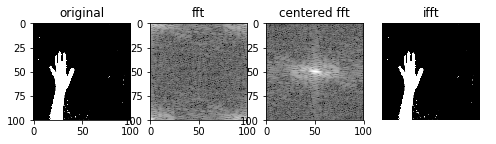

./images/Fourier\house.gif


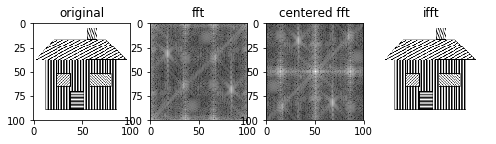

./images/Fourier\squares.png


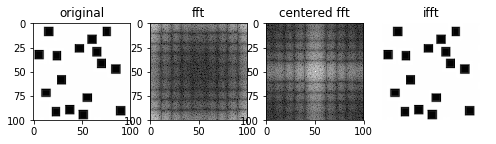

./images/Fourier\textures.jpg


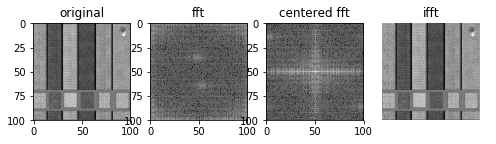

./images/Fourier\tiled.png


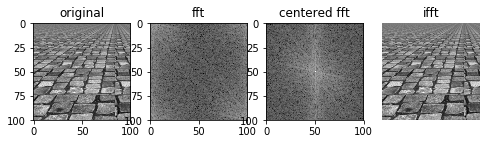

./images/Fourier\zebra-wall.png


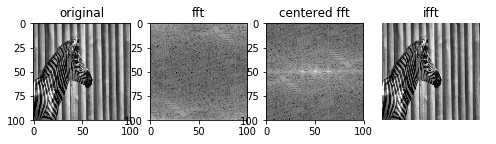

In [12]:
SUBDIR = os.path.join(IMDIR, "Fourier")

for root, dirnames, filenames in os.walk(SUBDIR):
    # print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            print(f)
            plt.subplot(141)
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100))
            plt.imshow(im,cmap='gray')
            plt.title('original')
            
            plt.subplot(142)
            im_fft=np.fft.fft2(im)
            im_fftlog=np.log(np.abs(im_fft))
            plt.imshow(im_fftlog,cmap='gray')
            plt.title('fft')
            
            plt.subplot(143)
            x=np.fft.fftshift(im_fft)
            im_fftcen=np.log(np.abs(x))
            plt.imshow(im_fftcen,cmap='gray')
            plt.title('centered fft')
            
            plt.subplot(144)
            im_fftdecen=np.fft.ifftshift(x)
            im_ifft=np.fft.ifft2(im_fftdecen)
            plt.imshow(np.abs(im_ifft),cmap='gray')
            plt.title('ifft')
            plt.axis('off')
            plt.show()
#No.1: In fft image only in vertical axis there are values,so there is variation in horizontal direction.
#No.2: In fft image only in horizontal axis there are values, so there is variation in vertical direction.
#No.3: In fft image there is much more high frequency information, so this image may have noise.
#No.4: In fft image the information mainly in →，↑，↙，↘ direction，so it has information in ↑，←，↘，↙ direction
#No.5: It has much more high frequency, but looks like regular.
#No.6: In x and y direction it varies frequently, the image varies a lot in y and direction.
#No.7；It varies frequently in x-axis and in fft image it has value on vertical axis. And there is also a little variance around horizontal
#      direction, so in fft it shows a line around horizontal axis.
#No.8: In the image the bakground varies frequently in horizontal direction, so it shows a vertical line on the fft image. The stripes of 
#      zebra also varies in some directions, so it shows a set of lines in the similar directions. 

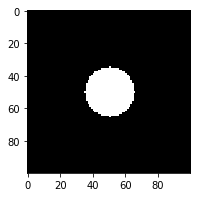

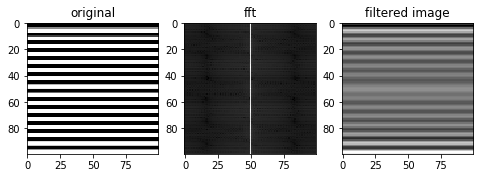

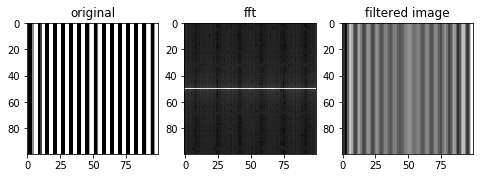

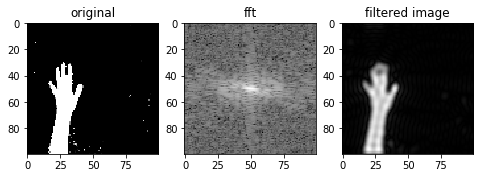

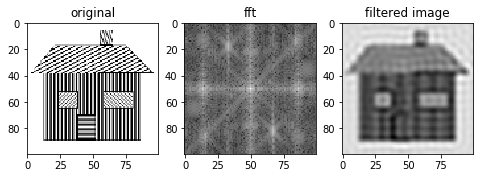

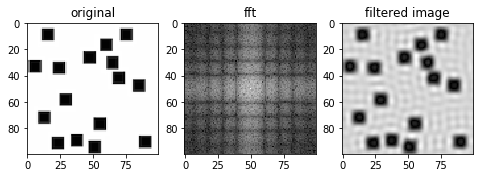

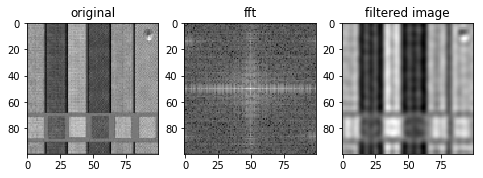

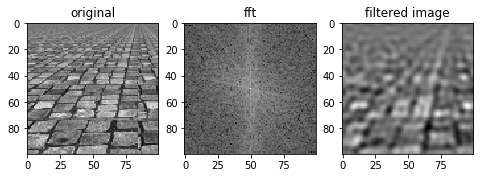

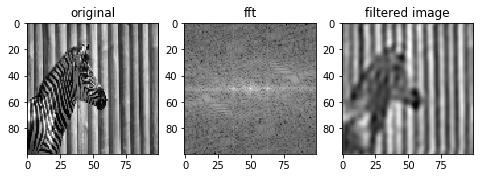

In [44]:
s=15
SUBDIR = os.path.join(IMDIR, "Fourier")
filt=np.zeros((100,100))
selem=disk(s)
filt[50-s:50+s+1,50-s:50+s+1]=selem
plt.imshow(filt,cmap='gray')
plt.show()
for root, dirnames, filenames in os.walk(SUBDIR):
    #print path to all filenames.
    for filename in filenames:
        f = os.path.join(root, filename)
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            im = io.imread(f,as_grey=True)
            im = resize(im,(100,100))
            if len(im.shape)>2:
                im=rgb2gray(im)
            plt.subplot(131)
            plt.imshow(im,cmap='gray')
            plt.title('original')
            im_fft = np.fft.fft2(im)
            x = np.fft.fftshift(im_fft)
            y = np.log(np.abs(x))
            plt.subplot(132)
            plt.imshow(y,cmap='gray')
            plt.title('fft')
            #filtering
            im_filtered=filt*x
            im_decen=np.fft.ifftshift(im_filtered)
            im_ifft=np.fft.ifft2(im_decen)
            plt.subplot(133)
            plt.imshow(np.abs(im_ifft),cmap='gray')
            plt.title('filtered image')
            plt.show()          